<a href="https://colab.research.google.com/github/Rikupro-creator/100-Machine-Learning-Projects-with-Source-Code-2024-/blob/master/Heart_Disease_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project requires the use of logistic regression which is a binary classification  model. now lets start with loading the packages we will need for this analysis.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import io
from google.colab import files

 now we have the packages lets load the dataset.

In [4]:
uploaded=files.upload()

Saving framingham.csv to framingham.csv


In [5]:
data=pd.read_csv(io.BytesIO(uploaded['framingham.csv']))

In [6]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


lets look at the data types of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


from the above, we note that none of the variables is non-numeric and   there are variabels that have missing values. Logistic regression cannot be fitted in a dataset that has missing values. we have to ensure that we deal with them. Lets explore the missing values next.

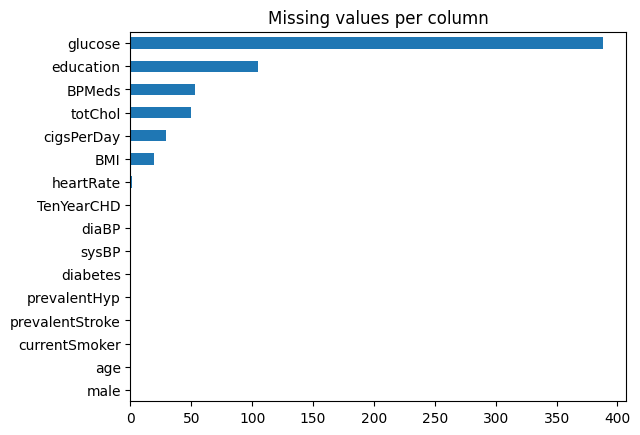

In [10]:
data.isna().sum().sort_values().plot(kind='barh')
plt.title('Missing values per column');

Glucose has the highest  mising values, followed by education.  In total, six variables have missing values.

What is our target variables?

The goal of this project is to predict if  a person has a heart disease given  the dataset. Lets look at teh target variable.

In [11]:
data['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


Its categorical and there are two main variables.  1 indicates  heart disease and 0 indicates no heart disease.

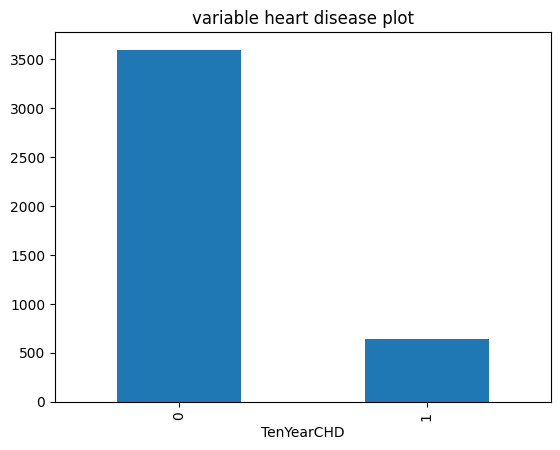

In [12]:
# lets plot the above

data['TenYearCHD'].value_counts().plot(kind='bar')
plt.title('variable heart disease plot');

 Dealing with missing values

 I just want to make it simple here. lets fill the missing values with the median


In [22]:
data.fillna(data.median(), inplace=True)

# data preparation.

I am starting with  spliting the dataset

In [23]:
y=data['TenYearCHD']
X=data.drop('TenYearCHD', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

# lets look at the data

X_train.shape, X_test.shape # great we have it the way we would have wanted.

((3392, 15), (848, 15))

now, its time to standardize the dataset

In [24]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


X_train_scaled.shape, X_test_scaled.shape

((3392, 15), (848, 15))

Now, that we have the data scaled and transformed. Its time that we fit the model  on the dataset

In [25]:
lr=LogisticRegression()
# lets do this with the dataset  that was not scaled and see how the model performs
lr.fit(X_train, y_train)
preds=lr.predict(X_test)
accuracy_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8584905660377359

an accuracy of 85% that is great. Lets try with the scaled dataset

In [26]:
# lets redo with the  scaled dataset
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

preds=lr.predict(X_test_scaled)

accuracy_score(y_test, preds)

0.8549528301886793

In [27]:
# ooh it perfoms much worse

#  lets go a step further and try other models. Lets try SVM model

In [29]:
from sklearn.svm import SVC

svc=SVC()

svc.fit(X_train, y_train)

preds= svc.predict(X_test)

accuracy_score(y_test, preds)

0.8561320754716981

not that good as compared to  the original logistic regresison model. lets redo it with decision tree model


In [30]:
# what about with the  scaled dataset?

svc=SVC()
svc.fit(X_train_scaled, y_train)
preds=svc.predict(X_test_scaled)
accuracy_score(y_test, preds)


0.8525943396226415

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

preds=dt.predict(X_test)

accuracy_score(y_test, preds)

0.75

This one is much worse.

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(X_train, y_train)

preds=RF.predict(X_test)

accuracy_score(y_test, preds)

0.8584905660377359

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(X_train_scaled, y_train)

preds=RF.predict(X_test_scaled)

accuracy_score(y_test, preds)

0.8514150943396226

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbt=GradientBoostingClassifier()
gbt.fit(X_train, y_train)

preds=gbt.predict(X_test)

accuracy_score(y_test, preds)

0.8490566037735849

 Lets try this final model.


In [36]:
from lightgbm import LGBMClassifier

lgb=LGBMClassifier()

lgb.fit(X_train, y_train)

preds=lgb.predict(X_test)
accuracy_score(y_test, preds)

[LightGBM] [Info] Number of positive: 521, number of negative: 2871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 3392, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153597 -> initscore=-1.706666
[LightGBM] [Info] Start training from score -1.706666


0.8443396226415094

# things to explore to reach the 90% accuracy.

  1. Recursive feature selection

  2. other ways of  dealing with missing values

  3. Try catboost model
  
  4. deal with the imbalanced dataset